In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
import time

# Preparing The Data

In [60]:
data_dir = Path('C:\\Users\\afiqe\\Downloads\\DatasetNew')

In [61]:
print(data_dir)

C:\Users\afiqe\Downloads\DatasetNew


C:\Users\afiqe\Downloads\DatasetNew\nasi lemak\0.jpg


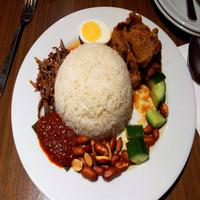

In [62]:
makanan = list(data_dir.glob('nasi lemak/*'))
print(makanan[0])
PIL.Image.open(str(makanan[0]))

In [65]:
img_height,img_width=180,180
batch_size=32

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
    ]
)

In [66]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,)

Found 950 files belonging to 5 classes.
Using 760 files for training.


In [67]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,)

Found 950 files belonging to 5 classes.
Using 190 files for validation.


In [53]:
class_names = train_ds.class_names
print(class_names)

['nasi lemak', 'roti bakar', 'roti canai', 'roti telur', 'teh tarik']


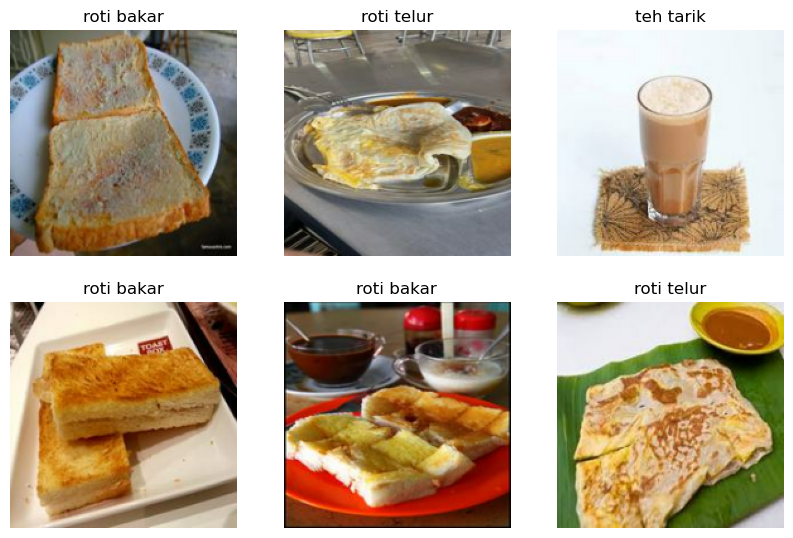

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [68]:
alexnet_model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(180,180,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation='softmax')  
])

In [69]:
alexnet_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 43, 43, 128)       46592     
                                                                 
 batch_normalization_20 (Ba  (None, 43, 43, 128)       512       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 21, 21, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 21, 21, 256)       819456    
                                                                 
 batch_normalization_21 (Ba  (None, 21, 21, 256)       1024      
 tchNormalization)                                               
                                                      

In [74]:
# alexnet_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

alexnet_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)

In [75]:
epochs = 50
history = alexnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
)

Epoch 1/50
24/24 [==============================] - 14s 545ms/step - loss: 0.1573 - accuracy: 0.9474 - val_loss: 0.8255 - val_accuracy: 0.6947
Epoch 2/50
24/24 [==============================] - 13s 525ms/step - loss: 0.1171 - accuracy: 0.9632 - val_loss: 0.8030 - val_accuracy: 0.7000
Epoch 3/50
24/24 [==============================] - 12s 505ms/step - loss: 0.1253 - accuracy: 0.9671 - val_loss: 0.6598 - val_accuracy: 0.7368
Epoch 4/50
24/24 [==============================] - 13s 547ms/step - loss: 0.0874 - accuracy: 0.9763 - val_loss: 0.7470 - val_accuracy: 0.7158
Epoch 5/50
24/24 [==============================] - 13s 546ms/step - loss: 0.0756 - accuracy: 0.9829 - val_loss: 0.9113 - val_accuracy: 0.6632
Epoch 6/50
24/24 [==============================] - 13s 521ms/step - loss: 0.0836 - accuracy: 0.9737 - val_loss: 0.7265 - val_accuracy: 0.7053
Epoch 7/50
24/24 [==============================] - 15s 615ms/step - loss: 0.0597 - accuracy: 0.9868 - val_loss: 0.7420 - val_accuracy: 0.7211

In [29]:
# After training the model, save it to a local directory
model_save_path = 'C:\\Users\\afiqe\\Downloads\\AlexNet'  # Replace with your desired local directory

# Save the model
alexnet_model.save(model_save_path)

print("Model saved to", model_save_path)

INFO:tensorflow:Assets written to: C:\Users\afiqe\Downloads\AlexNet\assets


INFO:tensorflow:Assets written to: C:\Users\afiqe\Downloads\AlexNet\assets


Model saved to C:\Users\afiqe\Downloads\AlexNet


# Evaluating The Model

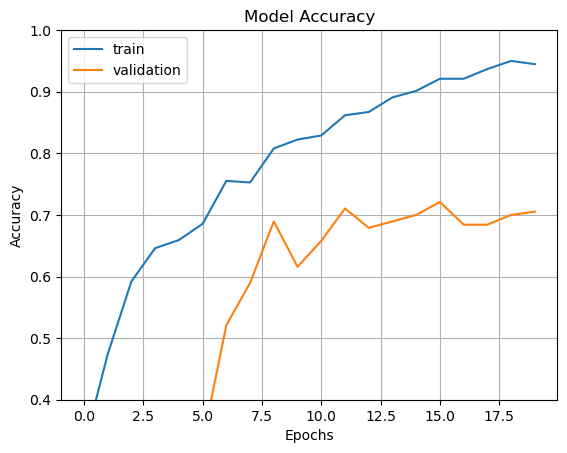

In [72]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

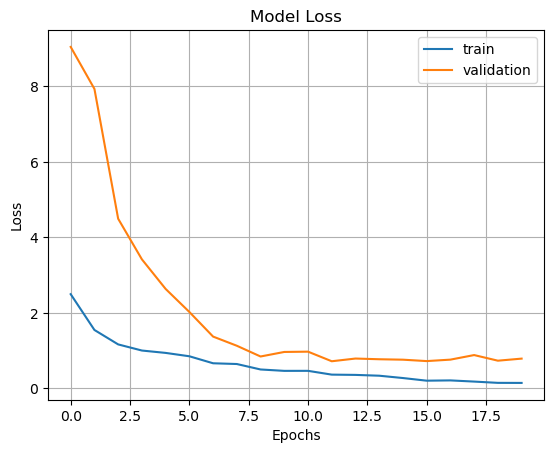

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

(1, 180, 180, 3)


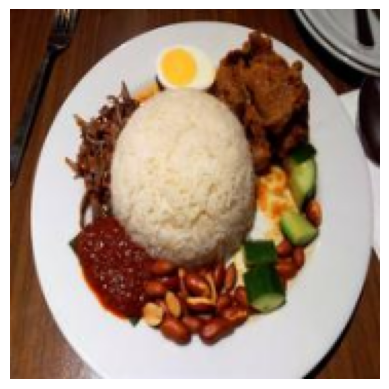

In [25]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(str(makanan[0]))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)

print(image.shape)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for proper display
plt.axis('off')  # Turn off axis labels
plt.show()


In [26]:
pred=alexnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 166ms/step
[[9.9888760e-01 1.0492299e-04 1.0332714e-06 6.8805247e-07 1.0046593e-03
  6.3981304e-07 8.5414321e-08 1.1965777e-07 8.8696304e-08 2.6376867e-07]]


In [27]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is nasi lemak
